In [1]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

okt = Okt()

In [2]:
df = pd.read_csv("C:\\Users\\dmb08\\Desktop\\블랙보드 개선안 공모전\\blackboard_dataset.csv")

In [3]:
Q_list = [24, 26, 28, 30, 34, 38, 40, 44] # 문항 번호 입력
Q_index = [x+4 for x in Q_list] # 해당하는 index 번호 추출

def colname(index_L: list):
    tmp = [x for x in df.columns]
    Q_colname = []
    for i in index_L:
        Q_colname.append(tmp[i])
    return Q_colname

Q_colnames = colname(Q_index)
df_new = df[Q_colnames]

In [4]:
def chart(final_df, num):
    sns.set_style('whitegrid')
    sns.countplot(x='label', data=final_df)
    plt.savefig('C:\\Users\\dmb08\\Desktop\\블랙보드 개선안 공모전\\text clustering\\graph_{}.png'.format(num))

                                                  text  label
0    전반 적 인 모든 것 ( 사실 모바일 사용 을 권장 하지 않고 있지 않습니까 ??!...      1
1                            코스 화면 이 안 들어 가짐 UI 도 별로 임      4
2                                             알림 기능 선택      1
3                        앱 에 접속 할 때 마다 로그인 해야 하는 게 귀찮다      2
4                                              #NAME ?      1
..                                                 ...    ...
154  알림 이 제때 오지 않는 경우 가 대다수 고 , 종종 로그인 이 해제 되어 다시 로...      2
155                  " 현재 " 학기 의 코스 가 최상 단 에 떴으면 좋겠음 .      4
156                          현재 수강 중인 코스 가 가장 밑 에 위치 함      4
157  얼마 전 에 코스 에 들어가면 튕기 는 오류 가 있었는데 개선 잘 해주세요 . 모바...      4
158                                노트북 과 너무 달라 서 찾기 힘듦      1

[159 rows x 2 columns]
                                             text  label
0    한눈 에 가능하면 좋겠음 / 과제 등 캘린더 일정 이 간략히 같이 떴으면 좋겠음      0
1                                        코스 순서 배열      2
2          코스 의 사진 은 교수 님 의 스진 으로 바꿨으면 더 좋을 겉 같아요      4
3   

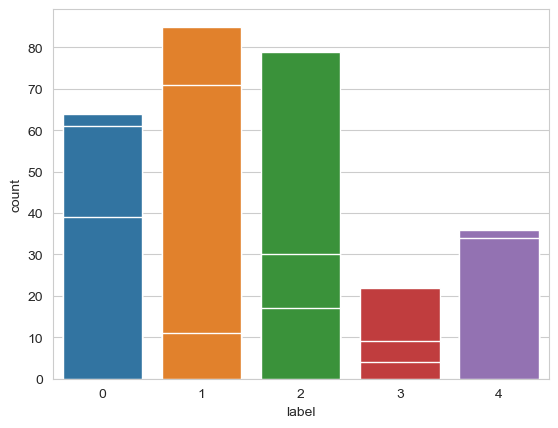

In [5]:
for i, colname in enumerate(df_new):
    num = i
    Q_num = Q_list[num]

    globals()['df_{}'.format(num)] = pd.DataFrame(df_new[colname].values, columns=['original'])
    # df_1, df_2, ... 변수별로 데이터프레임 형성
    globals()['df_{}'.format(num)] = (globals()['df_{}'.format(num)]).dropna()
    globals()['df_{}'.format(num)].dropna()
    
    globals()['df_{}'.format(num)] = globals()['df_{}'.format(num)].astype('string')

    df_tmp = globals()['df_{}'.format(num)].iloc[:,0]
    contents = []
    for k in df_tmp:
        contents.append(okt.morphs(k))
    text = [' '.join(contents[i]) for i in range(len(contents))]
    df_tmp_2 = pd.DataFrame(text, columns=['text'])

    vectorize = TfidfVectorizer(ngram_range=(1,3))
    x = vectorize.fit_transform(text)

    new_df = pd.DataFrame(x.toarray(), columns=vectorize.get_feature_names_out())

    kmeans = KMeans(n_clusters=5, random_state=108).fit(new_df)

    tmp = kmeans.labels_.reshape(-1,1)
    label_df = pd.DataFrame(tmp, columns=['label'])

    final_df = pd.concat([df_tmp_2,label_df], axis=1)
    print(final_df)
    final_df.to_csv("C:\\Users\\dmb08\\Desktop\\블랙보드 개선안 공모전\\text clustering\\final_{}.csv".format(Q_num), encoding='utf-8-sig')

    chart(final_df, Q_num)

    # CountStatus = pd.value_counts(final_df['label'].values, sort=True)
    # CountStatus.plot.bar()
    # CountStatus.plot.bar(grid=True, figsize=(10,8), fontsize=15)  # figsize, fontsize 조정